## import of libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [72]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [73]:
train_data = df.drop('id', axis=1)

In [74]:
train_data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Exploratory data analysis

In [75]:
train_data.isnull().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [77]:
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data visualization

<AxesSubplot:xlabel='toxic', ylabel='count'>

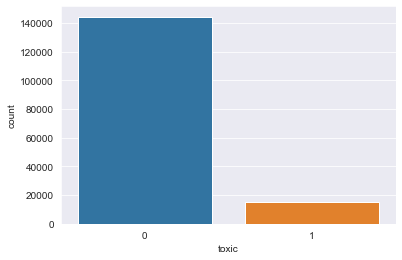

In [78]:
sns.countplot(data=train_data, x= 'toxic')

<AxesSubplot:xlabel='severe_toxic', ylabel='count'>

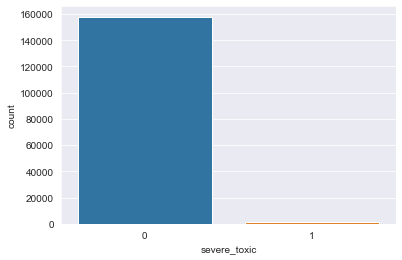

In [79]:
sns.countplot(data=train_data, x= 'severe_toxic')

<AxesSubplot:xlabel='identity_hate', ylabel='count'>

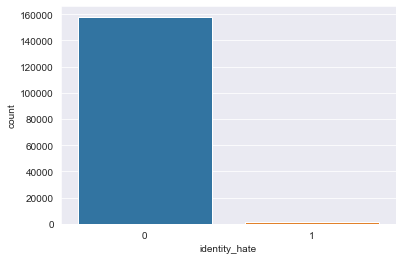

In [80]:
sns.countplot(data=train_data, x= 'identity_hate')

<AxesSubplot:xlabel='threat', ylabel='count'>

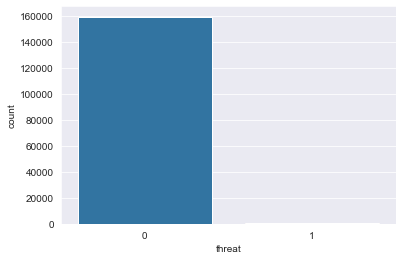

In [81]:
sns.countplot(data=train_data, x= 'threat')

<AxesSubplot:xlabel='insult', ylabel='count'>

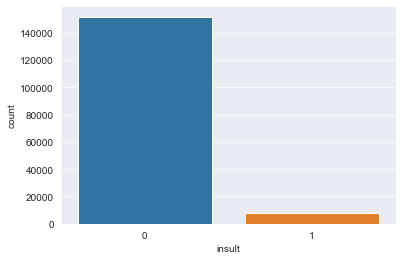

In [82]:
sns.countplot(data=train_data, x= 'insult')

<AxesSubplot:xlabel='obscene', ylabel='count'>

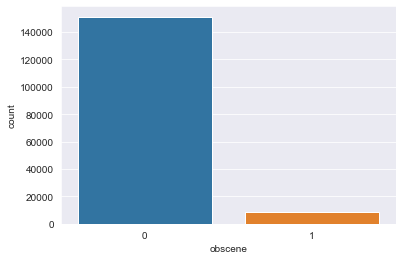

In [83]:
sns.countplot(data=train_data, x= 'obscene')

**let explore which comment classification occured most**

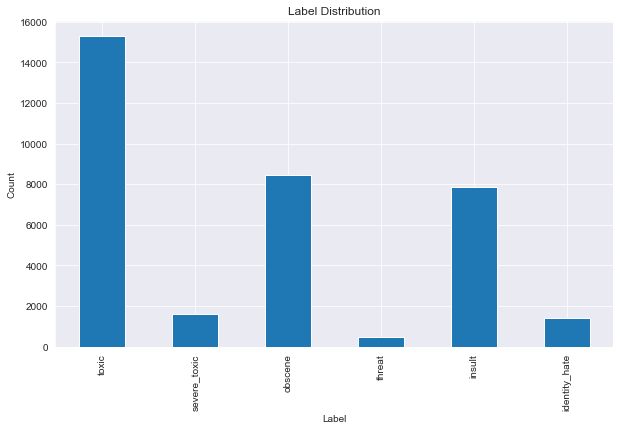

In [84]:
label_counts = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [85]:
# List for toxicity criteria
toxicity_criteria = [];

# For loop for getting the columns in dataset
for col in df.columns:

    # Add column name in toxicity criteria list
    toxicity_criteria.append(col)

# Delete the first two column names since it is not part of toxicity criteria
# Deleted columns: id and comment_text
del toxicity_criteria[:2]

# Print the toxicity criteria list
print(toxicity_criteria)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [86]:
# Use len(df) for getting the total amount of comments (rows)
comments_sum = len(df)

# Use sum() function for getting the total amount of comment toxicity classification
toxic_sum = df[toxicity_criteria[0]].sum()
severe_toxic_sum = df[toxicity_criteria[1]].sum()
obscene_sum = df[toxicity_criteria[2]].sum()
threat_sum = df[toxicity_criteria[3]].sum()
insult_sum = df[toxicity_criteria[4]].sum()
identity_hate_sum = df[toxicity_criteria[5]].sum()


In [87]:
 #Convert comments_sum to string using str() function
print("Comments: " + str(comments_sum))


# Convert Sum of Toxicity Criteria to string using str() function
print("Toxic Comments: " + str(toxic_sum))
print("Severe Toxic Comments: " + str(severe_toxic_sum))
print("Obscene Comments: " + str(obscene_sum))
print("Threat Comments: " + str(threat_sum))
print("Insult Comments: " + str(insult_sum))
print("Identity Hate Comments: " + str(identity_hate_sum))

Comments: 159571
Toxic Comments: 15294
Severe Toxic Comments: 1595
Obscene Comments: 8449
Threat Comments: 478
Insult Comments: 7877
Identity Hate Comments: 1405


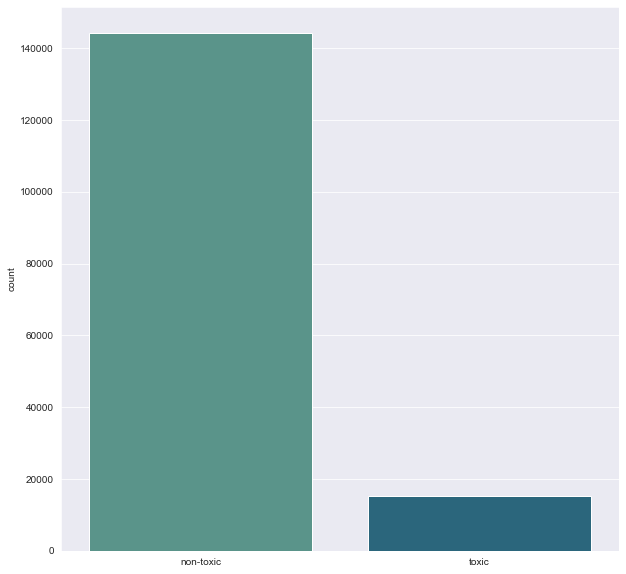

In [88]:
# List for Comments
comments = [];

# For loop for getting the toxic column in dataset
for comment in train_data['toxic']:

    # If comment value is 1 (comment is toxic)
    if (comment == 1):

        comments.append("toxic");
    else:
        comments.append("non-toxic");
# Set the figure size of Countplot Visualization to 10,10
fig, ax = plt.subplots(figsize=(10, 10))

# Countplot Visualization of Comments List
sns.countplot(x = comments, palette='crest', ax=ax);

**from the visualization we notice the imbalance between the non toxic comments and toxic, therefore we will need to under_sample  as a means to balance out the data to train our machine learning model**

<AxesSubplot:title={'center':'Correlation of Toxicity Criteria with Each Other'}>

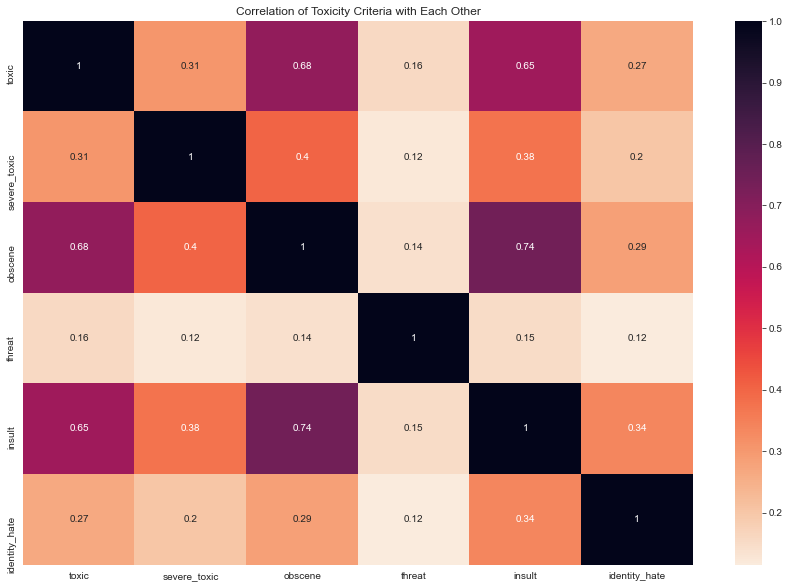

In [89]:

fig, ax = plt.subplots(figsize=(15, 10))

plt.title('Correlation of Toxicity Criteria with Each Other')

#Heatmap Visualization of Toxicity Criteria
sns.heatmap(df[toxicity_criteria].corr(),cmap='rocket_r', annot=True)

In [90]:
#Get a number of non-toxic comments sample that is the same total amount of toxic comments using sample() Method
non_toxic_undersample = train_data[train_data['toxic'] == 0].sample(n=(train_data['toxic'] == 1).sum(), random_state=201)

# Use concat() Method to balance the sum of Toxic and Non-toxic Comments
df = pd.concat([train_data[train_data['toxic'] == 1], non_toxic_undersample])

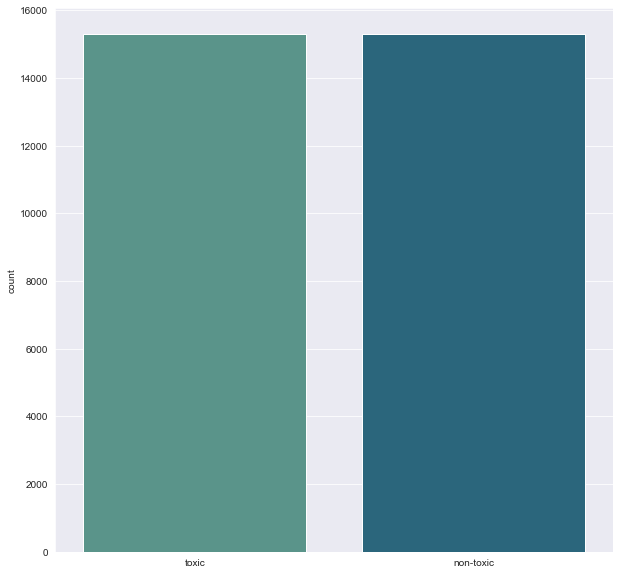

In [91]:
# List for Balanced Comments
balanced_comments = [];

# For loop for getting the toxic column in dataset
for comment in df['toxic']:

    # If comment value is 1 (comment is toxic)
    if (comment == 1):

        # Add Toxic Comments to Comments List
        balanced_comments.append("toxic");

    # Comment value must be 0 (comment is non-toxic)
    else:
         # Add Non-toxic Comments to Comments List
        balanced_comments.append("non-toxic");

# Set the figure size of Countplot Visualization to 10,10
fig, ax = plt.subplots(figsize=(10, 10))

# Create Countplot Visualization of Balanced Comments List
sns.countplot(x = balanced_comments, palette='crest', ax=ax);

**Now that our dataset have being under_sampled,we now see a balanced between the toxic and non toxic comments , this will help our model performance in when applied to unseen data**

In [92]:
X = df['comment_text']

y = df[toxicity_criteria]

In [93]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline steps
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=100))])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict with the pipeline
y_pred = pipeline.predict(X_test)

In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.5, random_state=102)


In [113]:
pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', RandomForestClassifier())])

In [114]:
y_pred2 = pipeline.predict(X_test2)

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      7675
           1       0.45      0.06      0.11       826
           2       0.89      0.70      0.79      4009
           3       0.53      0.07      0.13       229
           4       0.80      0.57      0.66      3711
           5       0.63      0.08      0.14       667

   micro avg       0.89      0.65      0.75     17117
   macro avg       0.71      0.38      0.45     17117
weighted avg       0.85      0.65      0.72     17117
 samples avg       0.37      0.32      0.33     17117



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3121
           1       0.49      0.07      0.12       351
           2       0.90      0.70      0.79      1610
           3       0.60      0.11      0.18        84
           4       0.80      0.56      0.66      1509
           5       0.67      0.07      0.13       267

   micro avg       0.89      0.65      0.75      6942
   macro avg       0.73      0.39      0.46      6942
weighted avg       0.86      0.65      0.72      6942
 samples avg       0.38      0.33      0.34      6942



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**saving the model**

In [102]:
import joblib

In [103]:
joblib.dump(pipeline,'toxicity_classifier.pkl')

['toxicity_classifier.pkl']

**MODEL PERSISTENCY**
**loading the test data and classifier**

In [104]:
test_data = pd.read_csv('test.csv')

In [105]:
test_data = test_data['comment_text']

In [106]:
rfc_model = joblib.load('toxicity_classifier.pkl')

In [107]:
rfc_model.predict(test_data)

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [145]:
me = list(df.columns)

In [148]:
col_name= me[0]

'comment_text'

In [149]:
joblib.dump(col_name,'column_names.pkl')

['column_names.pkl']

**i will go ahead to deploy this model on fastapi**

'comment_text'